In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from sklearn.preprocessing import MinMaxScaler 
import math

In [102]:
SP = pd.read_csv('List of SP 500 companies.csv')

In [17]:
sec = input()
SP_d = SP[SP.Sector == sec]

 Information Technology


In [20]:
SP_d.head()

,Symbol,Name,Sector
5,ACN,Accenture plc,Information Technology
7,ADBE,Adobe Inc.,Information Technology
9,AMD,Advanced Micro Devices Inc,Information Technology
14,AKAM,Akamai Technologies Inc,Information Technology
39,APH,Amphenol Corp,Information Technology


In [34]:
samp = SP_d.sample(n = 5)
samp

,Symbol,Name,Sector
213,GPN,Global Payments Inc.,Information Technology
246,INTC,Intel Corp.,Information Technology
303,MA,Mastercard Inc.,Information Technology
424,SNPS,Synopsys Inc.,Information Technology
76,AVGO,Broadcom Inc.,Information Technology


In [66]:
l = []
for i in samp['Symbol']:
    l.append(i)

In [79]:
count = 0
for i in samp['Symbol']:
    l[count] = (yf.download(i,start = '2018-01-01', interval = '1d'),i)
    count += 1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


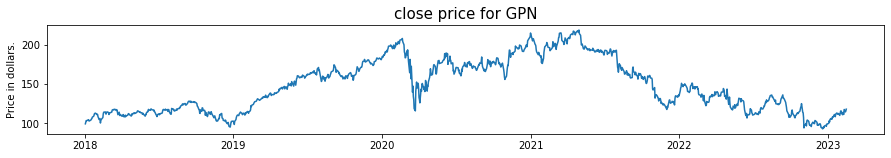

Current price: 118


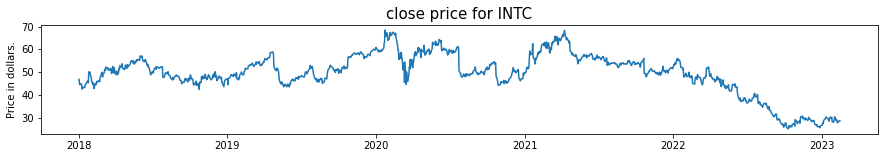

Current price: 29


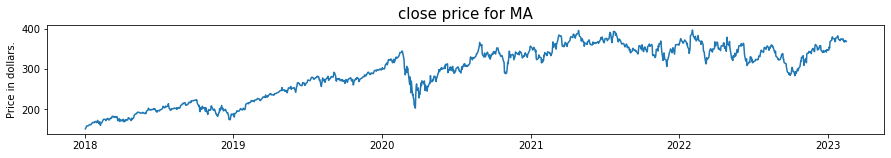

Current price: 368


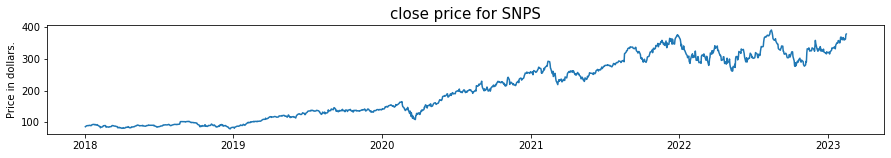

Current price: 378


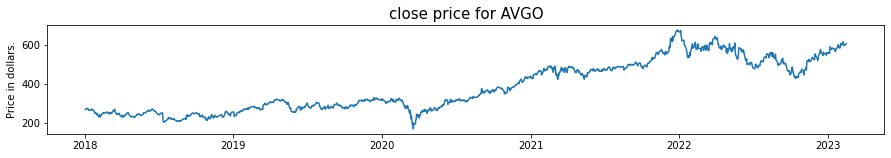

Current price: 604


In [101]:
for i in l:
    plt.figure(figsize=(15,2))
    plt.plot(i[0]['Close'])
    plt.title('close price for '+i[1], fontsize=15)
    plt.ylabel('Price in dollars.')
    plt.show()
    print('Current price:',round(i[0]['Close'].iloc[-1]))

In [107]:
cp = GPN['Close']
v = cp.values
train_len = math.ceil(len(v)* 0.85)

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(v.reshape(-1,1))
traind = scaled[0: train_len, :]

x_train = []
y_train = []

for i in range(90, len(traind)):
    x_train.append(traind[i-90:i, 0])
    y_train.append(traind[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))